In [24]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp 
from scipy.linalg import eigh 
import numpy as np 
def rbf_kernel_pca(x,gamma, n_components):
    
    sq_dists = pdist(x,"sqeuclidean")
    
    mat_sq_dists = squareform(sq_dists)
    
    k = exp(-gamma * mat_sq_dists)
    
    n = k.shape[0]
    one_n = np.ones((n,n)) / n
    k = k - one_n.dot(k) - k.dot(one_n) + one_n.dot(k).dot(one_n)
    
    eigvals, eigvecs = eigh(k)
    
    x_pc = np.column_stack( (eigvecs[:,-i] for i in range(1,n_components + 1)))
    
    return x_pc

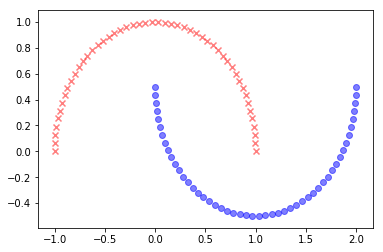

In [25]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 
x, y = make_moons(n_samples = 100, random_state = 123)

plt.scatter(x[y==0,0],x[y==0,1], color ="red",marker = "x",alpha = 0.5 )
plt.scatter(x[y==1,0],x[y==1,1], color ="blue",marker = "o",alpha = 0.5 )
plt.show()

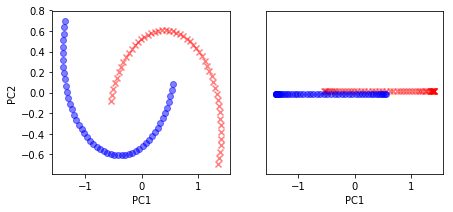

In [26]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
x_spca = scikit_pca.fit_transform(x)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))


ax[0].scatter(x_spca[y==0,0],x_spca[y==0,1], color ="red",marker = "x",alpha = 0.5 )
ax[0].scatter(x_spca[y==1,0],x_spca[y==1,1], color ="blue",marker = "o",alpha = 0.5 )

ax[1].scatter(x_spca[y==0,0],np.zeros((50,1))+0.02, color ="red",marker = "x",alpha = 0.5 )
ax[1].scatter(x_spca[y==1,0],np.zeros((50,1))-0.02, color ="blue",marker = "o",alpha = 0.5 )

ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")

plt.show()

/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


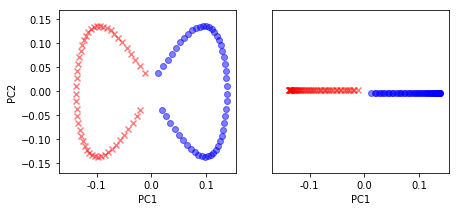

In [27]:
from matplotlib.ticker import FormatStrFormatter 

x_kpca = rbf_kernel_pca(x,gamma = 15, n_components = 2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))
ax[0].scatter(x_kpca[y==0,0],x_kpca[y==0,1], color ="red",marker = "x",alpha = 0.5 )
ax[0].scatter(x_kpca[y==1,0],x_kpca[y==1,1], color ="blue",marker = "o",alpha = 0.5 )

ax[1].scatter(x_kpca[y==0,0],np.zeros((50,1))+0.02, color ="red",marker = "x",alpha = 0.5 )
ax[1].scatter(x_kpca[y==1,0],np.zeros((50,1))-0.02, color ="blue",marker = "o",alpha = 0.5 )

ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")

ax[0].xaxis.set_major_formatter(FormatStrFormatter("%0.1f"))
ax[1].xaxis.set_major_formatter(FormatStrFormatter("%0.1f"))
plt.show()


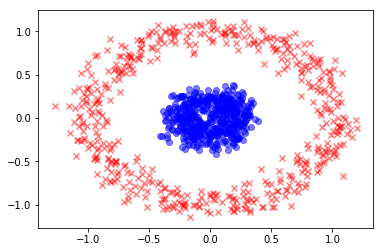

In [28]:
from sklearn.datasets import make_circles 
x, y  = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(x[y==0,0],x[y==0,1], color ="red",marker = "x",alpha = 0.5 )
plt.scatter(x[y==1,0],x[y==1,1], color ="blue",marker = "o",alpha = 0.5 )
plt.show()

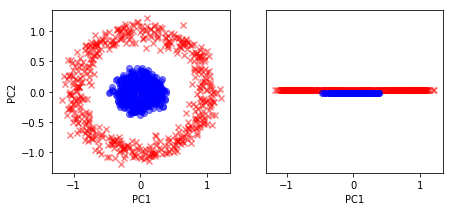

In [29]:
scikit_pca = PCA(n_components = 2)
x_spca = scikit_pca.fit_transform(x)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))
ax[0].scatter(x_spca[y==0,0],x_spca[y==0,1], color ="red",marker = "x",alpha = 0.5 )
ax[0].scatter(x_spca[y==1,0],x_spca[y==1,1], color ="blue",marker = "o",alpha = 0.5 )

ax[1].scatter(x_spca[y==0,0],np.zeros((500,1))+0.02, color ="red",marker = "x",alpha = 0.5 )
ax[1].scatter(x_spca[y==1,0],np.zeros((500,1))-0.02, color ="blue",marker = "o",alpha = 0.5 )

ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")


plt.show()

/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


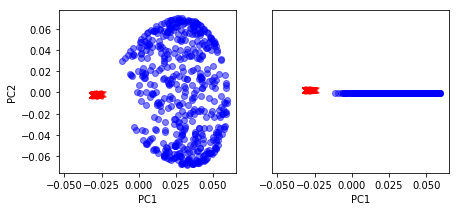

In [32]:
x_kpca = rbf_kernel_pca(x,gamma = 15, n_components = 2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))
ax[0].scatter(x_kpca[y==0,0],x_kpca[y==0,1], color ="red",marker = "x",alpha = 0.5 )
ax[0].scatter(x_kpca[y==1,0],x_kpca[y==1,1], color ="blue",marker = "o",alpha = 0.5 )

ax[1].scatter(x_kpca[y==0,0],np.zeros((500,1))+0.02, color ="red",marker = "x",alpha = 0.5 )
ax[1].scatter(x_kpca[y==1,0],np.zeros((500,1))-0.02, color ="blue",marker = "o",alpha = 0.5 )

ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")


plt.show()

In [38]:
def rbf_kernel_pca(x,gamma, n_components):
    
    sq_dists = pdist(x,"sqeuclidean")
    
    mat_sq_dists = squareform(sq_dists)
    
    k = exp(-gamma * mat_sq_dists)
    
    n = k.shape[0]
    one_n = np.ones((n,n)) / n
    k = k - one_n.dot(k) - k.dot(one_n) + one_n.dot(k).dot(one_n)
    
    eigvals, eigvecs = eigh(k)
    
    alphas = np.column_stack( (eigvecs[:,-i] for i in range(1,n_components + 1)))
    lambdas = [eigvals[-i] for i in range(1,n_components + 1)]
    
    return alphas, lambdas

In [39]:
x, y = make_moons(n_samples = 100, random_state = 123)
alphas , lambdas = rbf_kernel_pca(x, gamma = 15, n_components = 1)


x_new = x[25]
x_proj = alphas[25]
def project_x(x_new,x,gamma, alphas, lambdas):
    pair_dist = np.array([np.sum( (x_new - row) **2 ) for row in x])
    
    k = np.exp(-gamma * pair_dist)
    return k.dot( alphas / lambdas)

/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from ipykernel import kernelapp as app


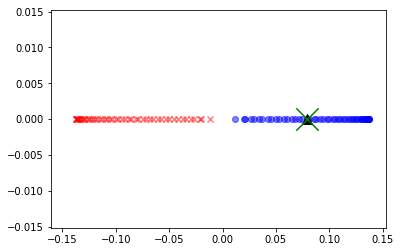

In [43]:
x_reproj = project_x(x_new,x,gamma=15,alphas=alphas, lambdas = lambdas)

plt.scatter(alphas[y==0,0],np.zeros((50)),color = "red",marker ="x",alpha = 0.5)
plt.scatter(alphas[y==1,0],np.zeros((50)),color = "blue",marker ="o",alpha = 0.5)


plt.scatter(x_proj, 0, color ="black", marker= "^", s = 100)
plt.scatter(x_reproj, 0, color ="green", marker= "x", s = 500)

plt.show()

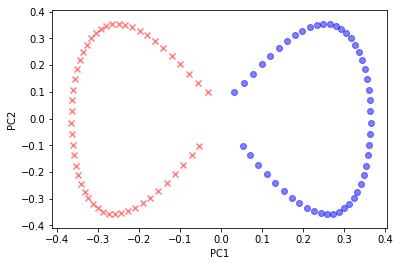

In [45]:
from sklearn.decomposition import KernelPCA

x, y = make_moons(n_samples = 100, random_state = 123)
scikit_kpca = KernelPCA(n_components = 2, kernel = "rbf",gamma = 15)
x_skernpca = scikit_kpca.fit_transform(x)




plt.scatter(x_skernpca[y==0,0],x_skernpca[y==0,1], color ="red",marker = "x",alpha = 0.5 )
plt.scatter(x_skernpca[y==1,0],x_skernpca[y==1,1], color ="blue",marker = "o",alpha = 0.5 )


plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()